In [191]:
from xml.sax import make_parser
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import missingno as msno 
import streamlit as st 
pd.options.display.max_rows = 70
pd.options.display.max_columns = 24
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import point

In [192]:
df = pd.read_csv("kc_house_data.csv")

In [193]:
df.shape

(21613, 21)

In [194]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [195]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<AxesSubplot:>

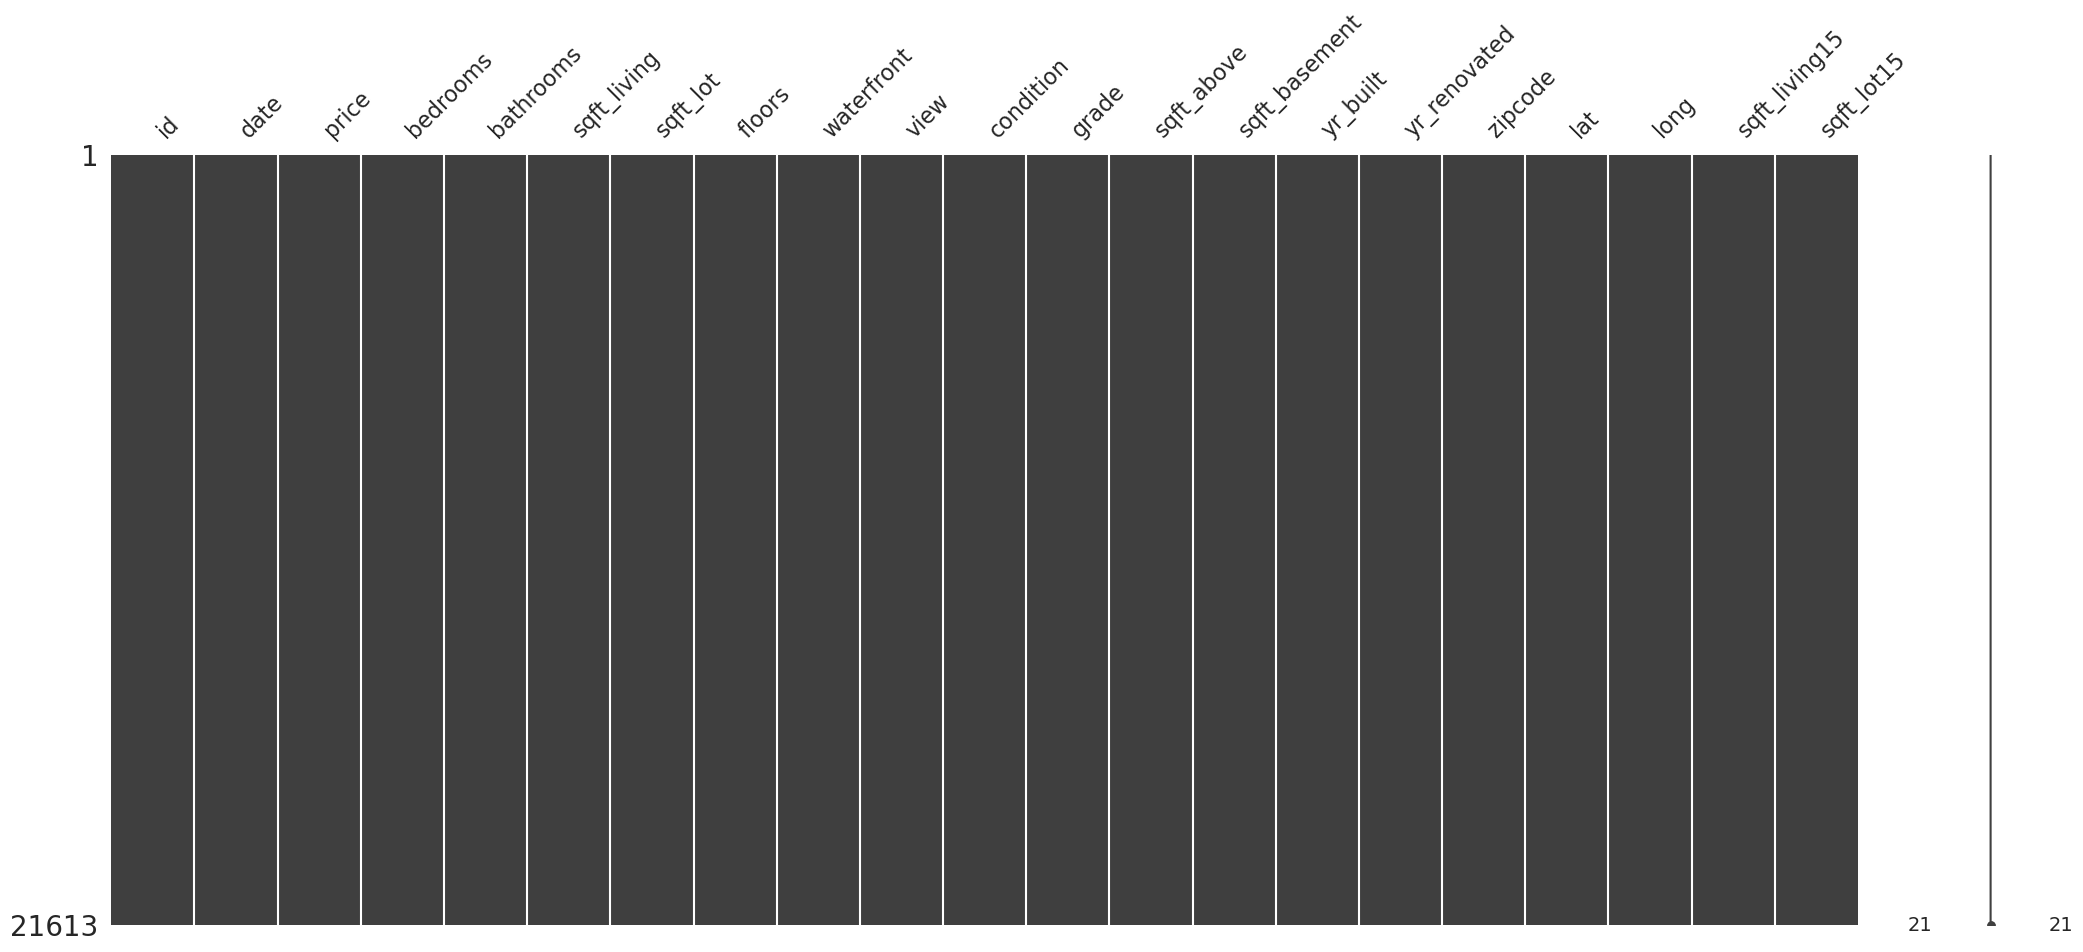

In [196]:
msno.matrix(df)

In [197]:
df.iloc[:,:]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [198]:
df['bathrooms'].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [199]:
df.groupby(['bedrooms','id']).mean()

price  bathrooms  sqft_living  sqft_lot  floors  \
bedrooms id                                                                
0        1222029077   265000.0       0.75        384.0  213444.0     1.0   
         1453602309   288000.0       1.50       1430.0    1650.0     3.0   
         2310060040   240000.0       2.50       1810.0    5669.0     2.0   
         2569500210   339950.0       2.50       2290.0    8319.0     2.0   
         2954400190  1295650.0       0.00       4810.0   28008.0     2.0   
...                        ...        ...          ...       ...     ...   
10       627300145   1148000.0       5.25       4590.0   10920.0     1.0   
         5566100170   650000.0       2.00       3610.0   11914.0     2.0   
         8812401450   660000.0       3.00       2920.0    3745.0     2.0   
11       1773100755   520000.0       3.00       3000.0    4960.0     2.0   
33       2402100895   640000.0       1.75       1620.0    6000.0     1.0   

                     waterfront  view  condition  grade  sqft_above  \
bedrooms id                                                           
0        1222029077         0.0   0.0        3.0    4.0       384.0   
         1453602309         0.0   0.0        3.0    7.0      1430.0   
         2310060040         0.0   0.0        3.0    7.0      1810.0   
         2569500210         0.0   0.0        3.0    8.0      2290.0   
         2954400190         0.0   0.0        3.0   12.0      4810.0   
...                         ...   ...        ...    ...         ...   
10       627300145          0.0   2.0        3.0    9.0      2500.0   
         5566100170         0.0   0.0        4.0    7.0      3010.0   
         8812401450         0.0   0.0        4.0    7.0      1860.0   
11       1773100755         0.0   0.0        3.0    7.0      2400.0   
33       2402100895         0.0   0.0        5.0    7.0      1040.0   

                     sqft_basement  yr_built  yr_renovated  zipcode      lat  \
bedrooms id                                                                    
0        1222029077            0.0    2003.0           0.0  98070.0  47.4177   
         1453602309            0.0    1999.0           0.0  98125.0  47.7222   
         2310060040            0.0    2003.0           0.0  98038.0  47.3493   
         2569500210            0.0    1985.0           0.0  98042.0  47.3473   
         2954400190            0.0    1990.0           0.0  98053.0  47.6642   
...                            ...       ...           ...      ...      ...   
10       627300145          2090.0    2008.0           0.0  98004.0  47.5861   
         5566100170          600.0    1958.0           0.0  98006.0  47.5705   
         8812401450         1060.0    1913.0           0.0  98105.0  47.6635   
11       1773100755          600.0    1918.0        1999.0  98106.0  47.5560   
33       2402100895          580.0    1947.0           0.0  98103.0  47.6878   

                        long  sqft_living15  sqft_lot15  
bedrooms id                                              
0        1222029077 -122.491         1920.0    224341.0  
         1453602309 -122.290         1430.0      1650.0  
         2310060040 -122.053         1810.0      5685.0  
         2569500210 -122.151         2500.0      8751.0  
         2954400190 -122.069         4740.0     35061.0  
...                      ...            ...         ...  
10       627300145  -122.113         2730.0     10400.0  
         5566100170 -122.175         2040.0     11914.0  
         8812401450 -122.320         1810.0      3745.0  
11       1773100755 -122.363         1420.0      4960.0  
33       2402100895 -122.331         1330.0      4700.0  

[21436 rows x 18 columns]

In [200]:
#sns.set_theme(style="ticks")
#sns.pairplot(df, hue="price")

2402100895

2402100895

In [201]:
df.loc[df['bedrooms'] > 10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8757,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [202]:
df = df.assign(surface = df.sqft_living * 0.092903)

In [203]:
df['surface']

0        109.62554
1        238.76071
2         71.53531
3        182.08988
4        156.07704
           ...    
21608    142.14159
21609    214.60593
21610     94.76106
21611    148.64480
21612     94.76106
Name: surface, Length: 21613, dtype: float64

In [204]:
df.groupby(['surface','price']).all()

,,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
surface,price,,,,,,,,,,,,,,,,,,,,
26.941870,142000.0,True,True,False,False,True,True,True,False,False,True,True,True,False,True,False,True,True,True,True,True
34.374110,276000.0,True,True,True,True,True,True,True,False,False,True,True,True,False,True,False,True,True,True,True,True
35.303140,245000.0,True,True,True,True,True,True,True,False,False,True,True,True,False,True,False,True,True,True,True,True
35.674752,265000.0,True,True,False,True,True,True,True,False,False,True,True,True,False,True,False,True,True,True,True,True
36.232170,228000.0,True,True,False,True,True,True,True,False,False,True,True,True,False,True,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895.584920,4668000.0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
918.810670,6885000.0,True,True,True,True,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True
932.746120,7062500.0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [205]:
df.loc[df['surface'] > 700]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,surface
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788,744.15303
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750,743.22400
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449,932.74612
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345,854.70760
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,1119.48115
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454,895.58492
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730,918.81067
12777,1225069038,20140505T000000,2280000.0,7,8.00,13540,307752,3.0,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800,1257.90662
13411,2426039123,20150130T000000,2415000.0,5,4.75,7880,24250,2.0,0,2,3,13,7880,0,1996,0,98177,47.7334,-122.362,2740,10761,732.07564
14032,3459900230,20141125T000000,1680000.0,4,3.75,7620,29536,2.0,0,3,3,11,5980,1640,2005,0,98006,47.5571,-122.140,2840,20809,707.92086


In [206]:
df.drop(df[df['bedrooms'] < 1].index, inplace= True)

In [207]:
df.shape

(21600, 22)

<AxesSubplot:>

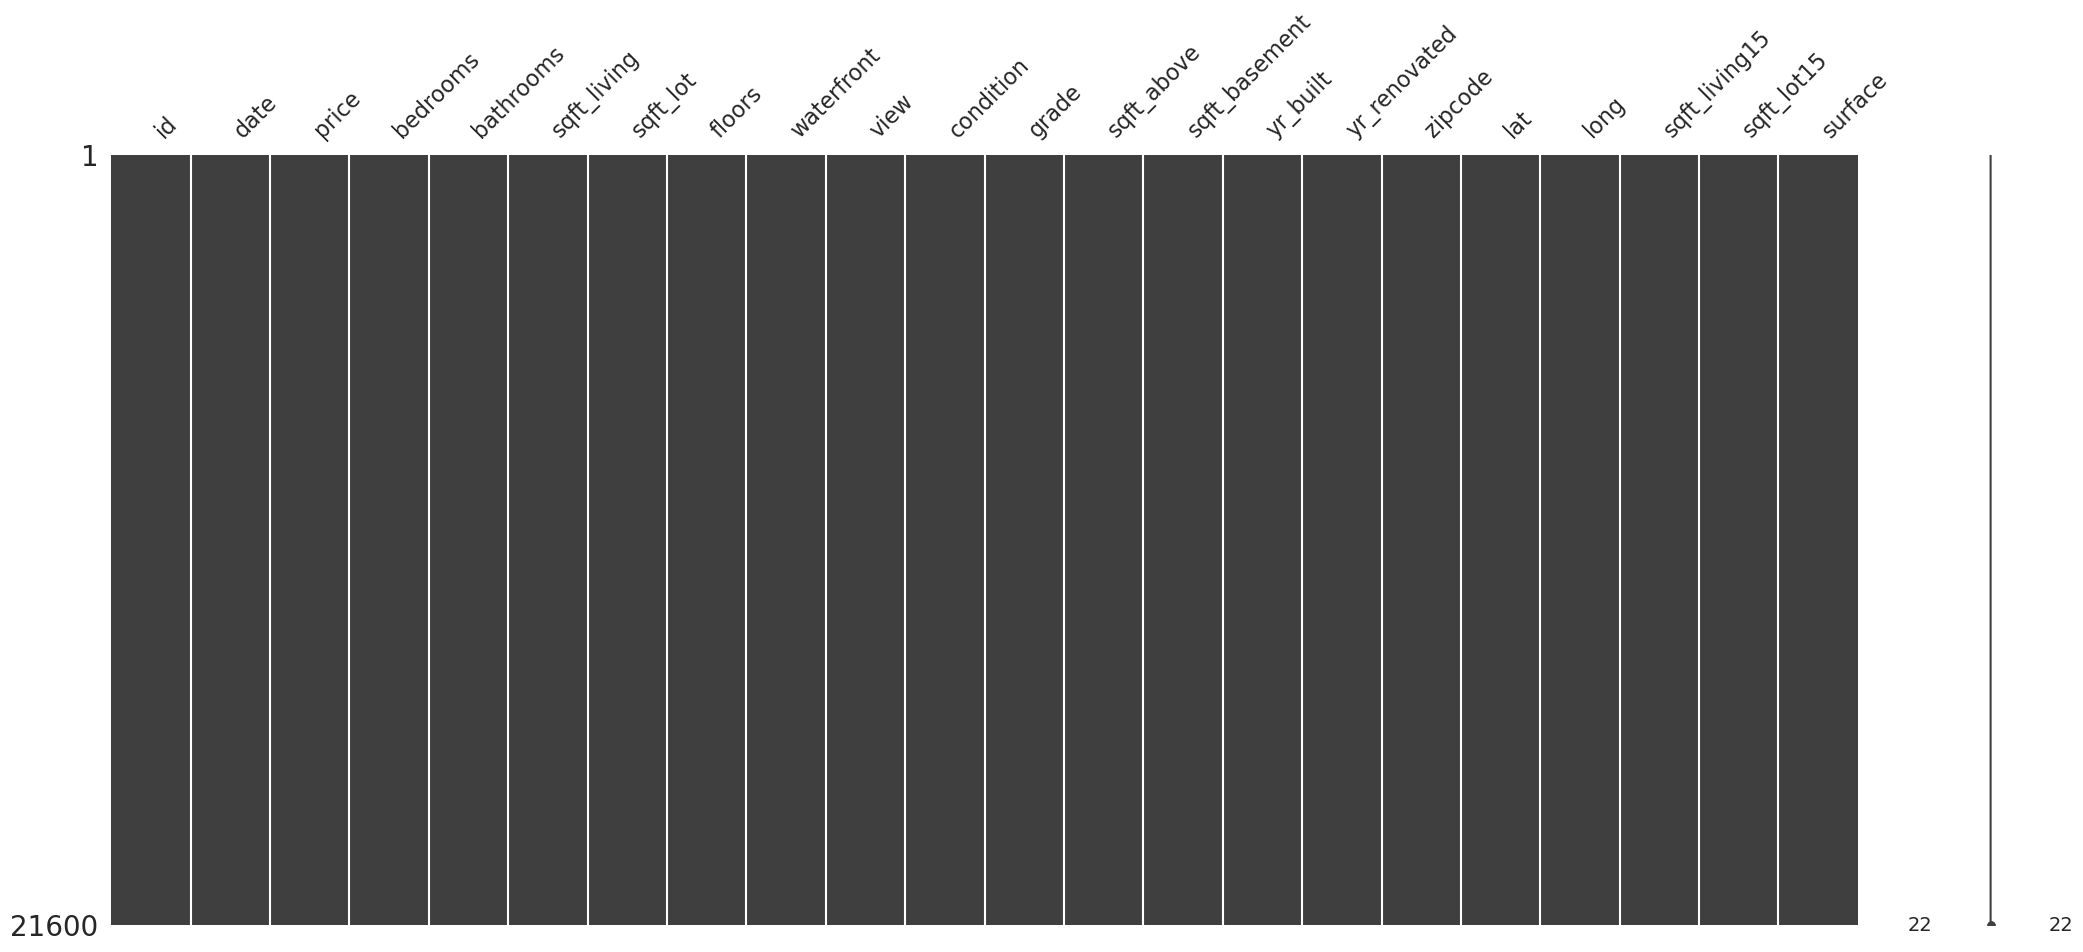

In [208]:
msno.matrix(df)

In [209]:
df.loc[df['yr_renovated'] >0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,surface
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,238.760710
35,9547205180,20140613T000000,696000.0,3,2.50,2300,3060,1.5,0,0,3,8,1510,790,1930,2002,98115,47.6827,-122.310,1590,3264,213.676900
95,1483300570,20140908T000000,905000.0,4,2.50,3300,10250,1.0,0,0,3,7,2390,910,1946,1991,98040,47.5873,-122.249,1950,6045,306.579900
103,2450000295,20141007T000000,1088000.0,3,2.50,2920,8113,2.0,0,0,3,8,2920,0,1950,2010,98004,47.5814,-122.196,2370,8113,271.276760
115,3626039325,20141121T000000,740500.0,3,3.50,4380,6350,2.0,0,0,3,8,2780,1600,1900,1999,98117,47.6981,-122.368,1830,6350,406.915140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19622,7351200295,20150114T000000,1150000.0,3,1.75,1760,6788,2.0,1,4,3,7,1760,0,1940,1960,98125,47.7336,-122.284,1630,7588,163.509280
20057,126039256,20140904T000000,434900.0,3,2.00,1520,5040,2.0,0,0,3,7,1520,0,1977,2006,98177,47.7770,-122.362,1860,8710,141.212560
20444,4305600360,20150225T000000,500012.0,4,2.50,2400,9612,1.0,0,0,3,8,1230,1170,1962,2009,98059,47.4799,-122.127,2430,5539,222.967200
20447,3319500628,20150212T000000,356999.0,3,1.50,1010,1546,2.0,0,0,3,8,1010,0,1971,2014,98144,47.5998,-122.311,1010,1517,93.832030


In [210]:
df.shape

(21600, 22)

In [211]:
df.groupby(['zipcode']).min()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,surface
zipcode,,,,,,,,,,,,,,,,,,,,,
98001,128500260,20140502T000000,100000.0,1,0.75,770,2064,1.0,0,0,2,5,770,0,1903,0,47.2576,-122.294,828,2855,71.53531
98002,1000102,20140514T000000,95000.0,1,0.75,690,2800,1.0,0,0,3,5,690,0,1908,0,47.2761,-122.229,860,2800,64.10307
98003,100500020,20140502T000000,128000.0,1,1.00,760,1302,1.0,0,0,2,6,760,0,1927,0,47.2574,-122.334,970,1302,70.60628
98004,249000115,20140505T000000,425000.0,2,1.00,860,779,1.0,0,0,1,6,820,0,1908,0,47.5806,-122.229,1290,794,79.89658
98005,324059112,20140505T000000,400000.0,2,1.00,980,2551,1.0,0,0,2,6,920,0,1943,0,47.5830,-122.185,1440,2601,91.04494
98006,97600140,20140502T000000,247500.0,2,0.75,930,1960,1.0,0,0,1,6,680,0,1911,0,47.5380,-122.197,1060,2511,86.39979
98007,11200070,20140502T000000,295000.0,2,1.00,970,1962,1.0,0,0,3,7,880,0,1954,0,47.5647,-122.153,1250,2055,90.11591
98008,224059021,20140502T000000,250000.0,2,1.00,940,1055,1.0,0,0,3,6,660,0,1942,0,47.5692,-122.132,990,1340,87.32882
98010,321079066,20140507T000000,135000.0,1,0.75,520,4814,1.0,0,0,3,4,520,0,1900,0,47.2931,-122.053,820,6160,48.30956


<AxesSubplot:xlabel='surface', ylabel='price'>

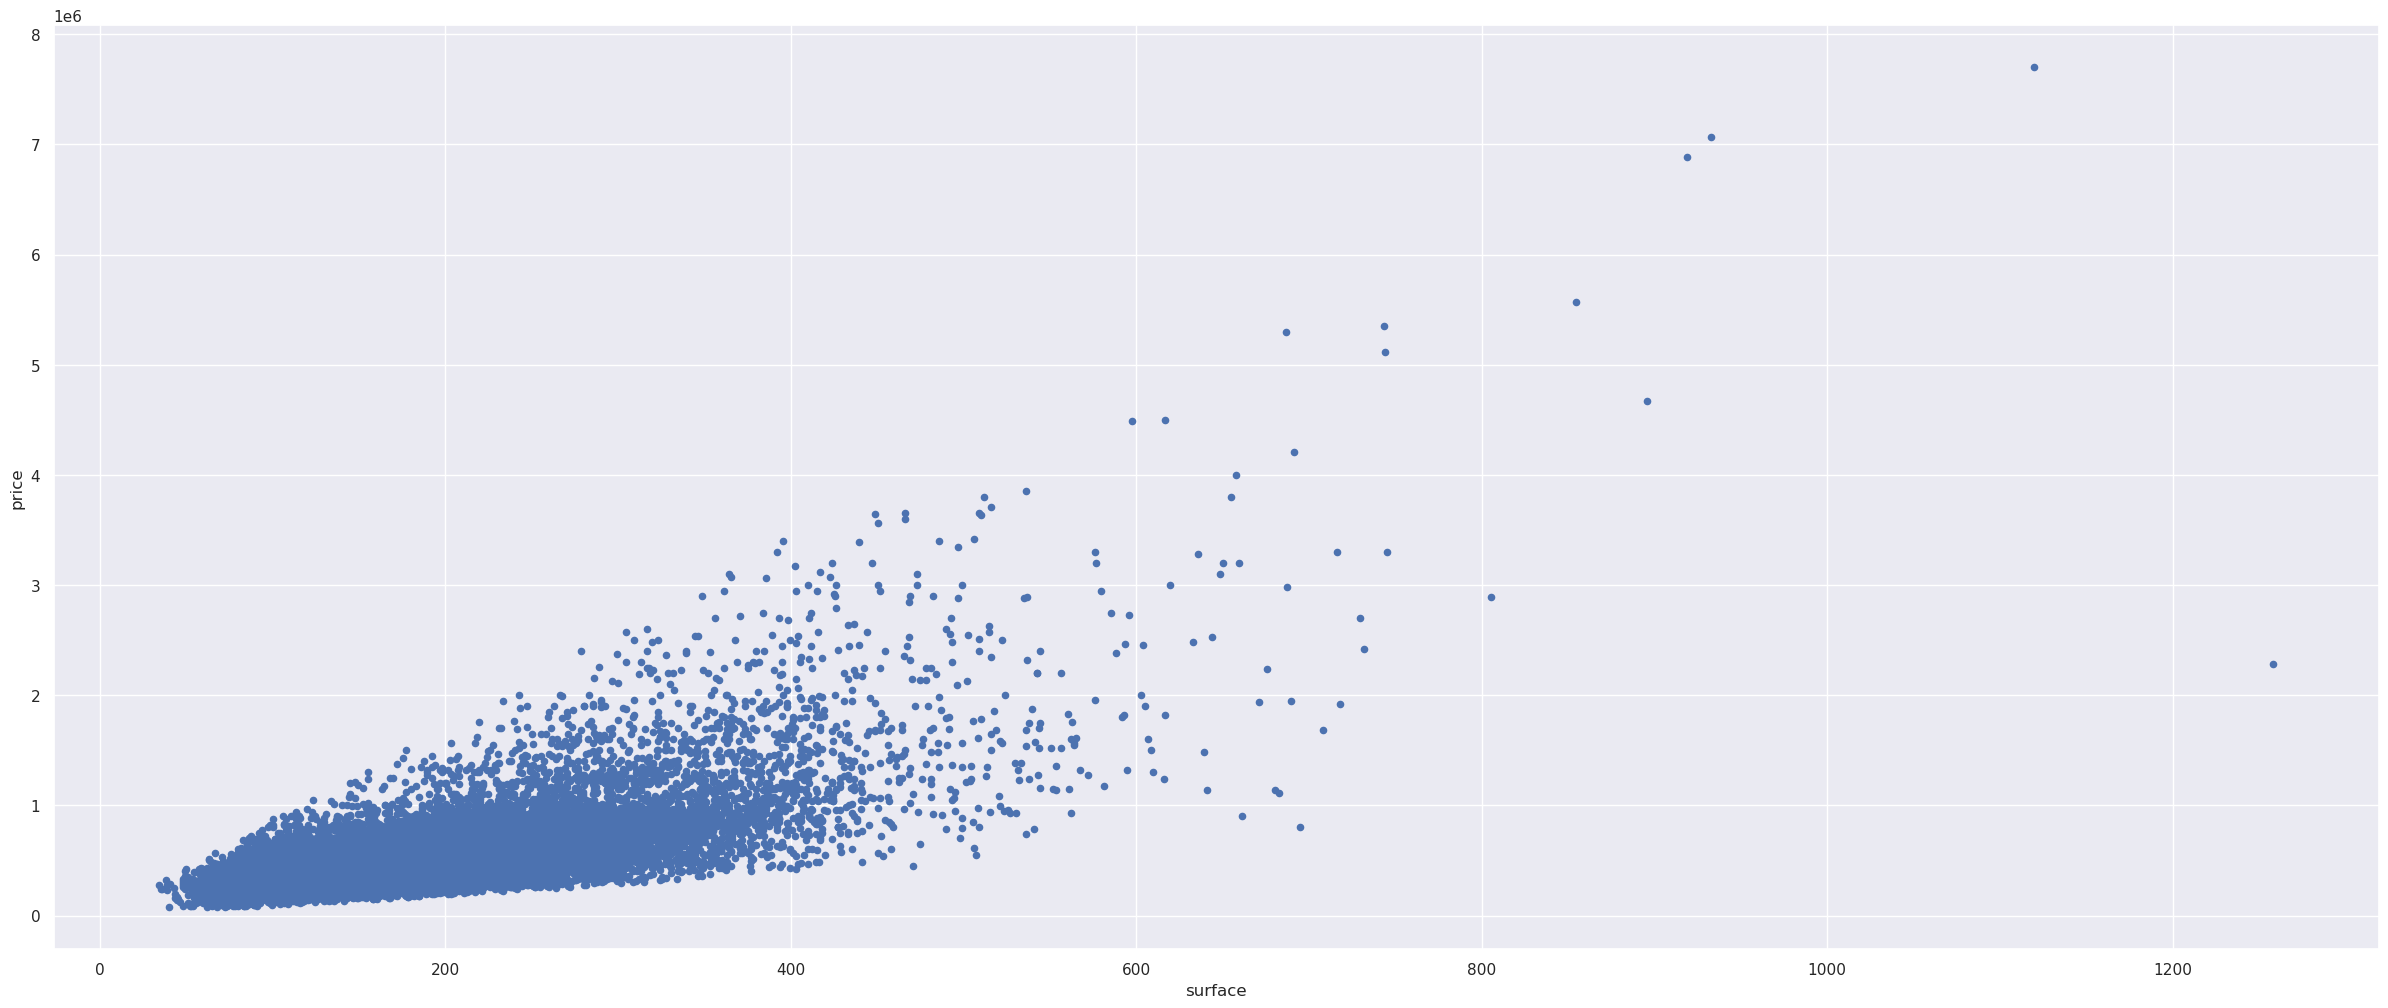

In [212]:
df.plot.scatter(x="surface",y="price") 

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

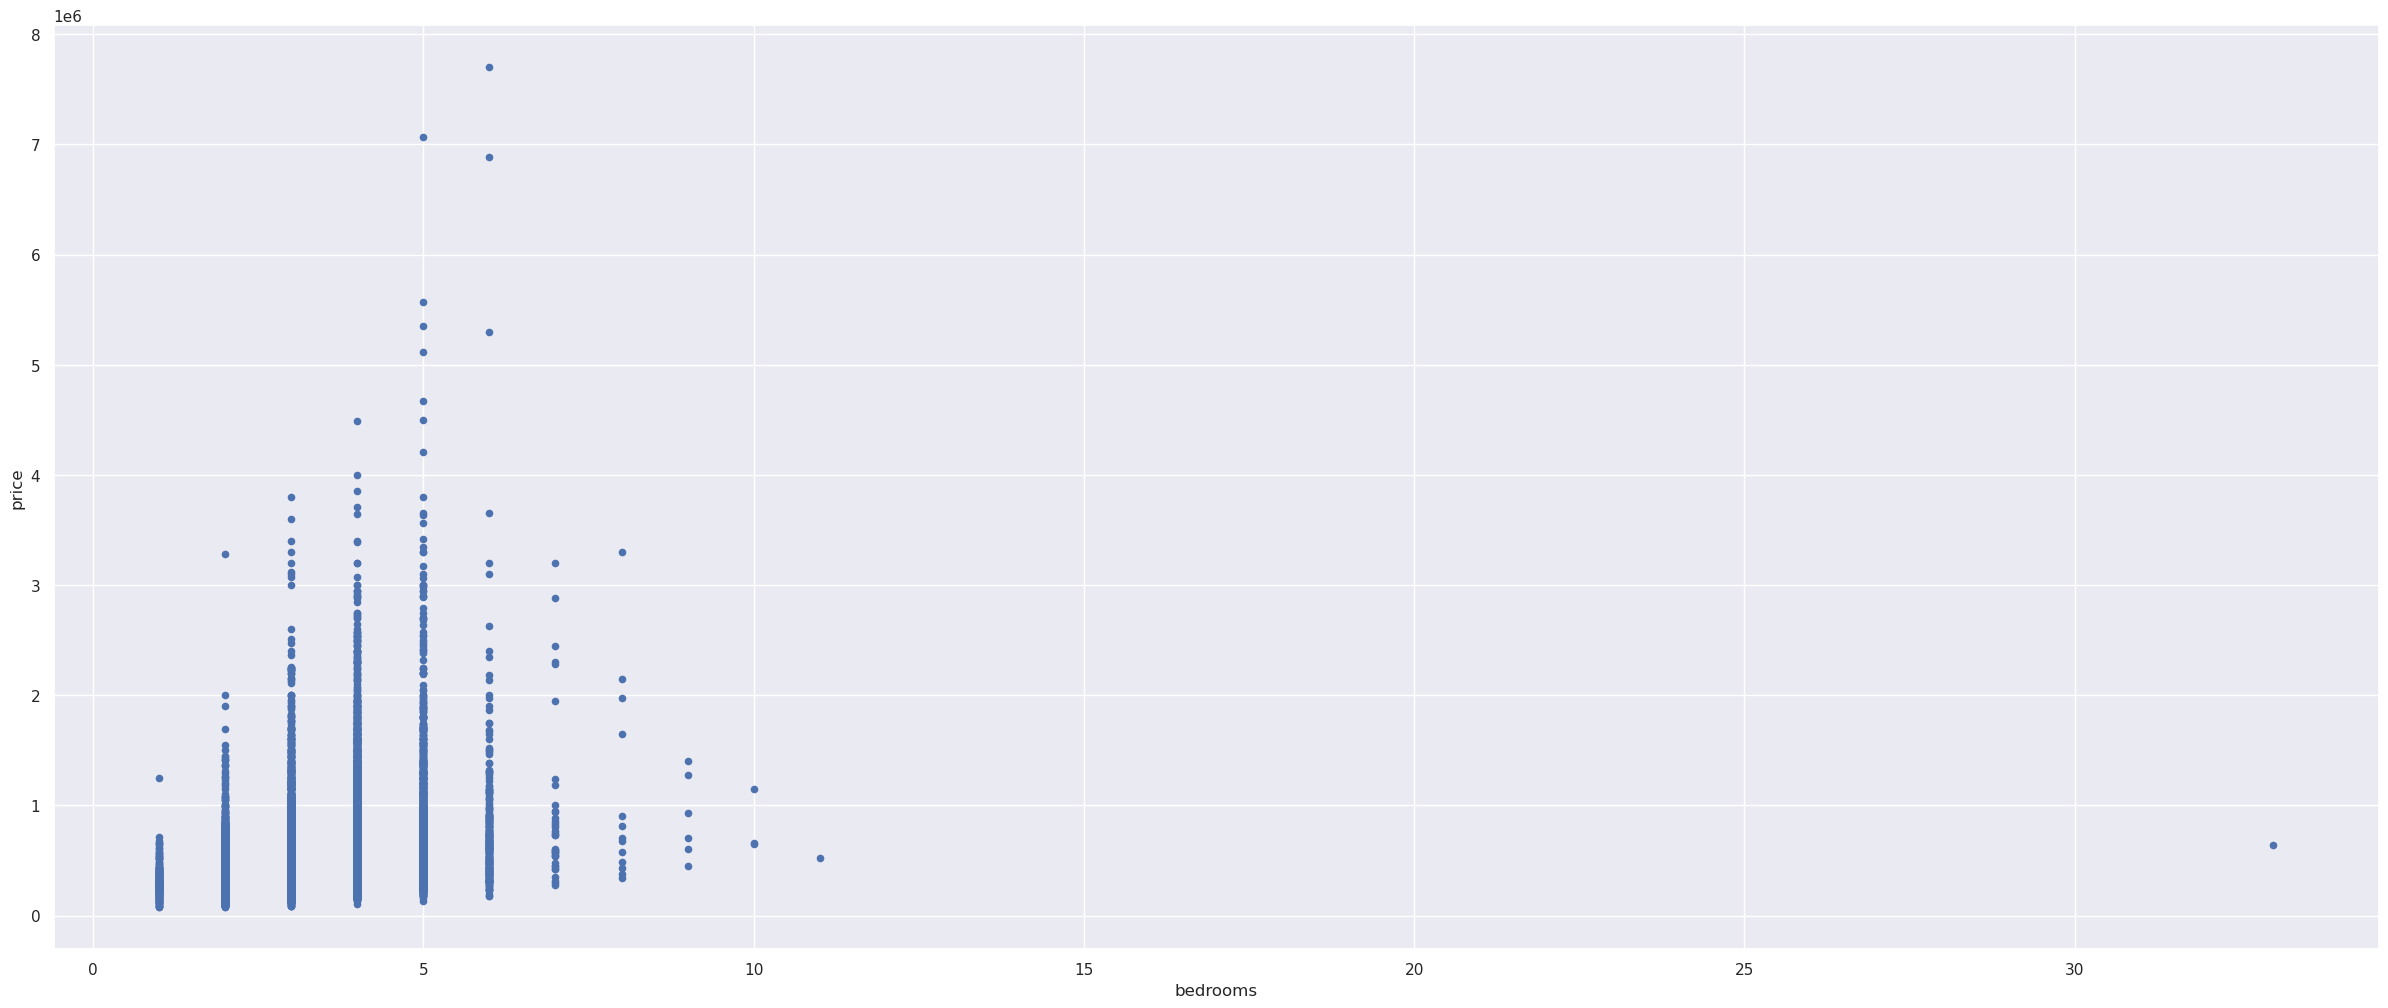

In [213]:
df.plot.scatter(x="bedrooms",y="price") 

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

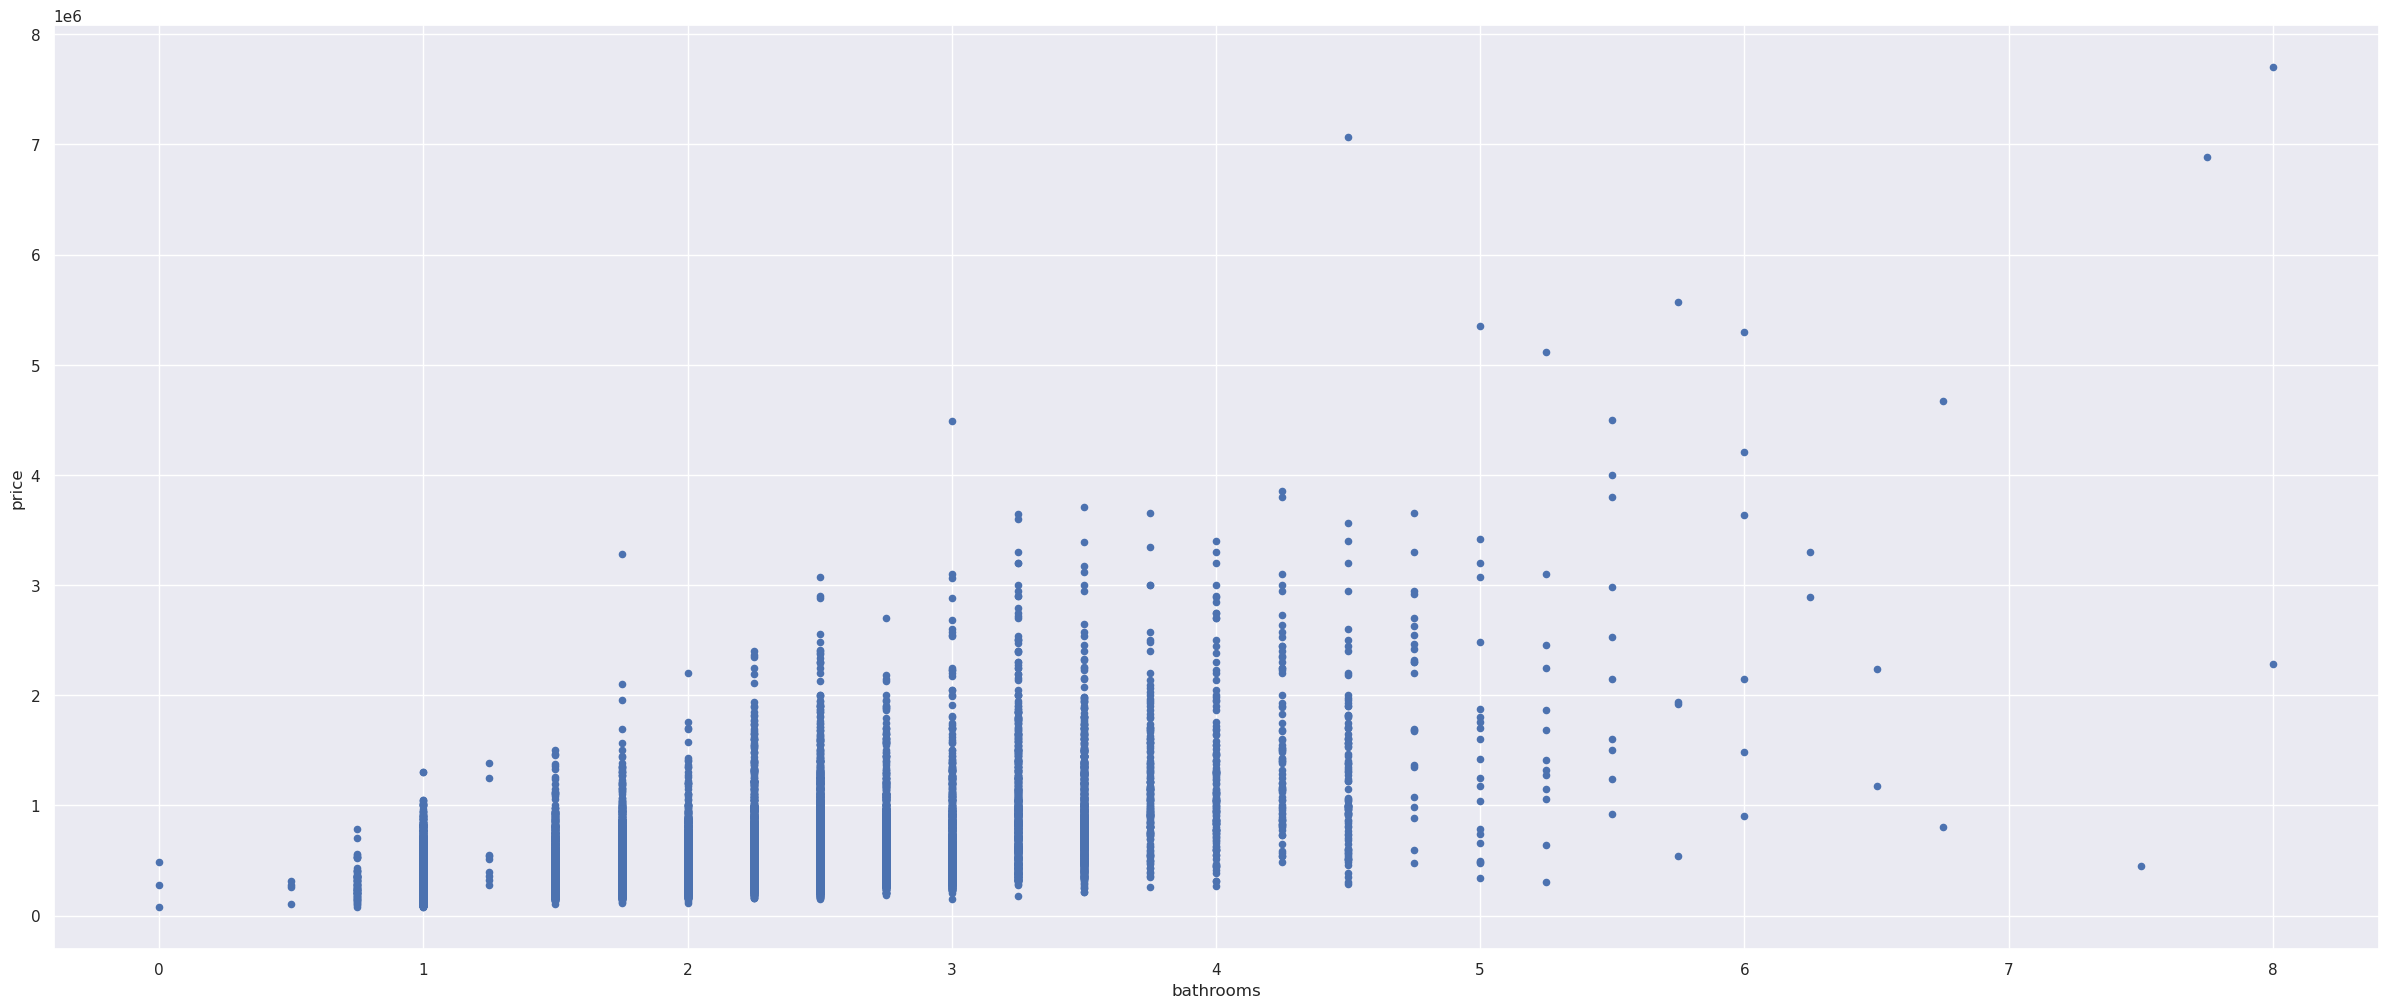

In [214]:
df.plot.scatter(x="bathrooms",y="price") 

<AxesSubplot:xlabel='bedrooms', ylabel='bathrooms'>

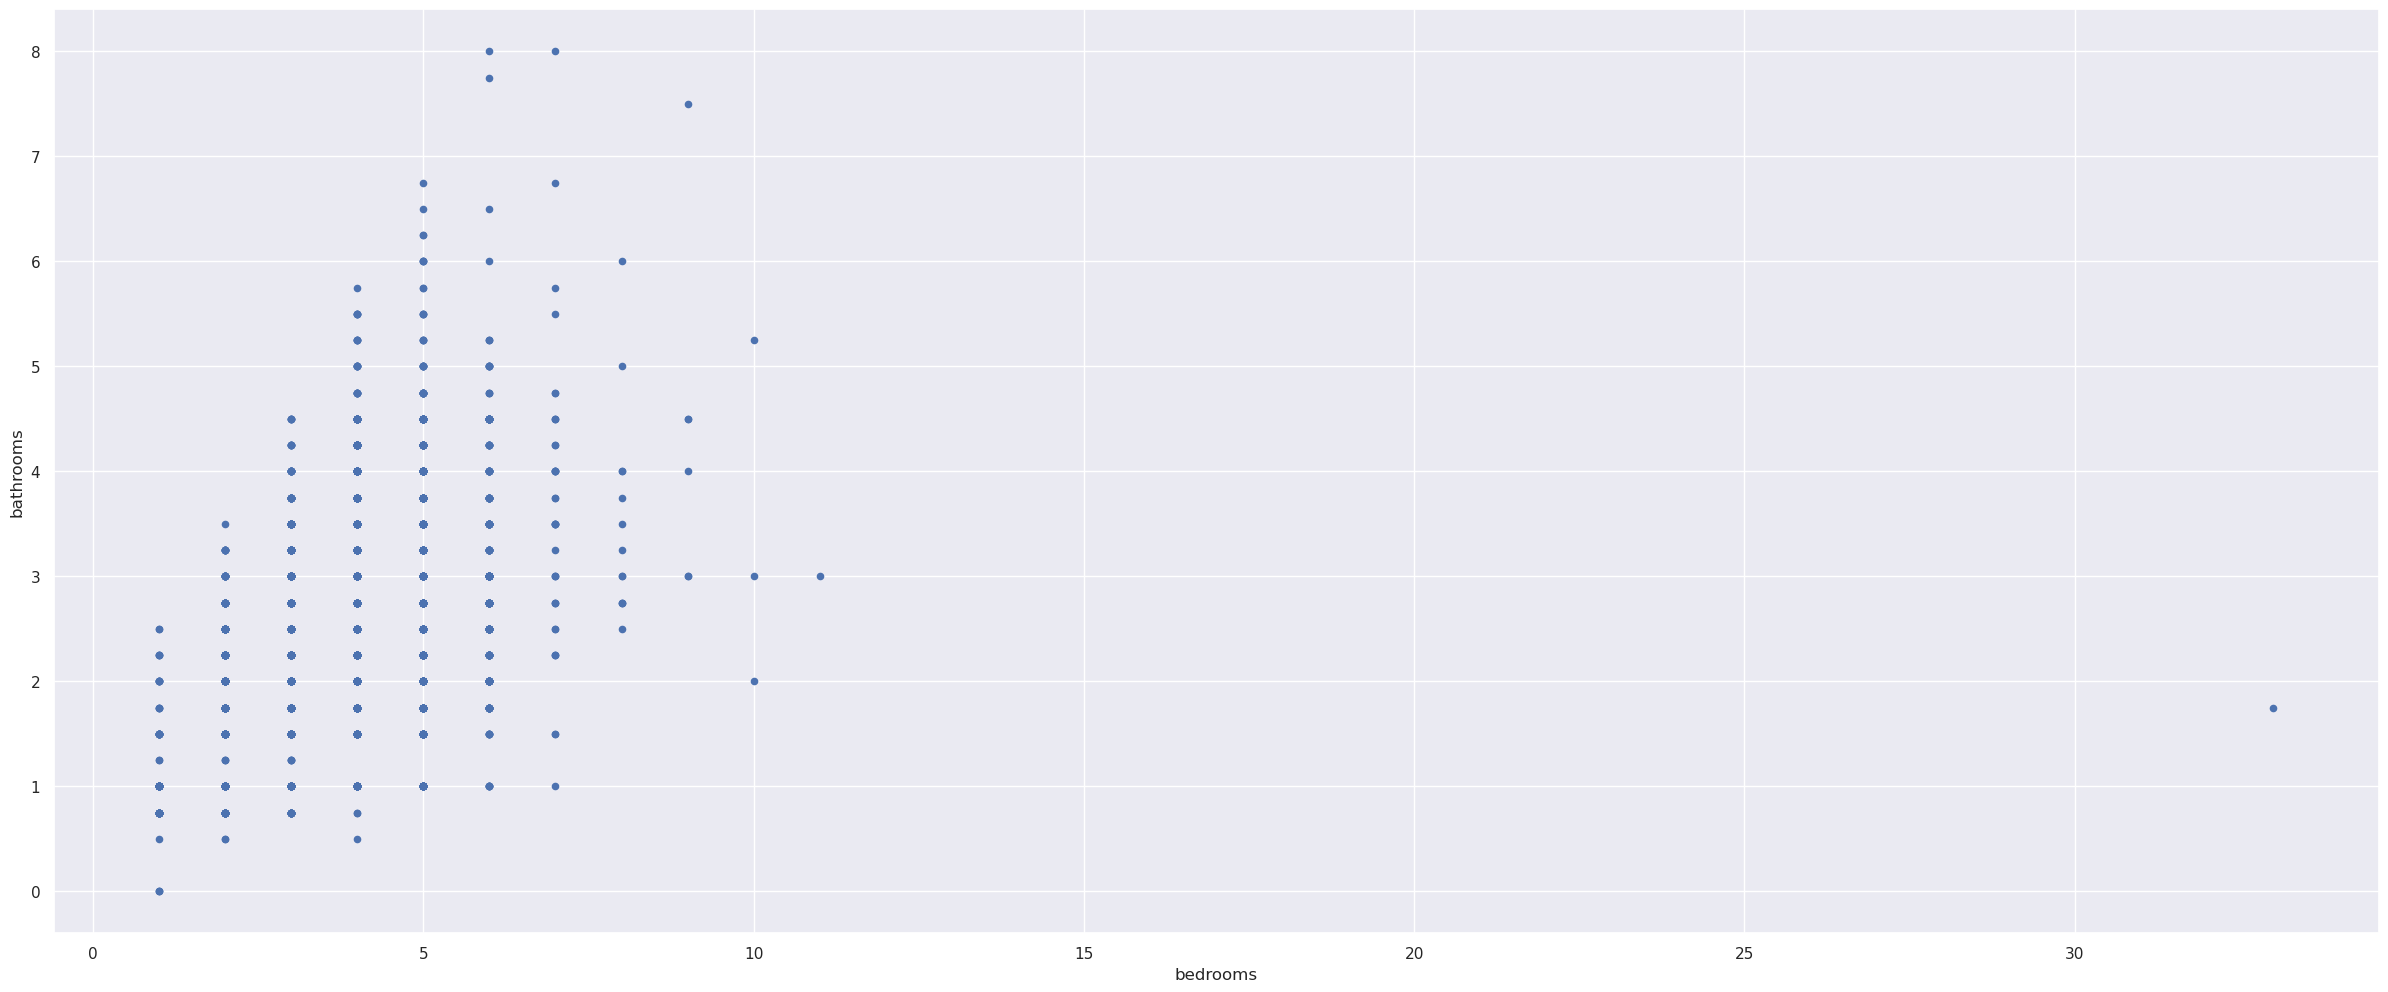

In [215]:
df.plot.scatter(x="bedrooms",y="bathrooms") 

In [216]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,surface
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,109.62554
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,238.76071
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,71.53531
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,182.08988
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,156.07704


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

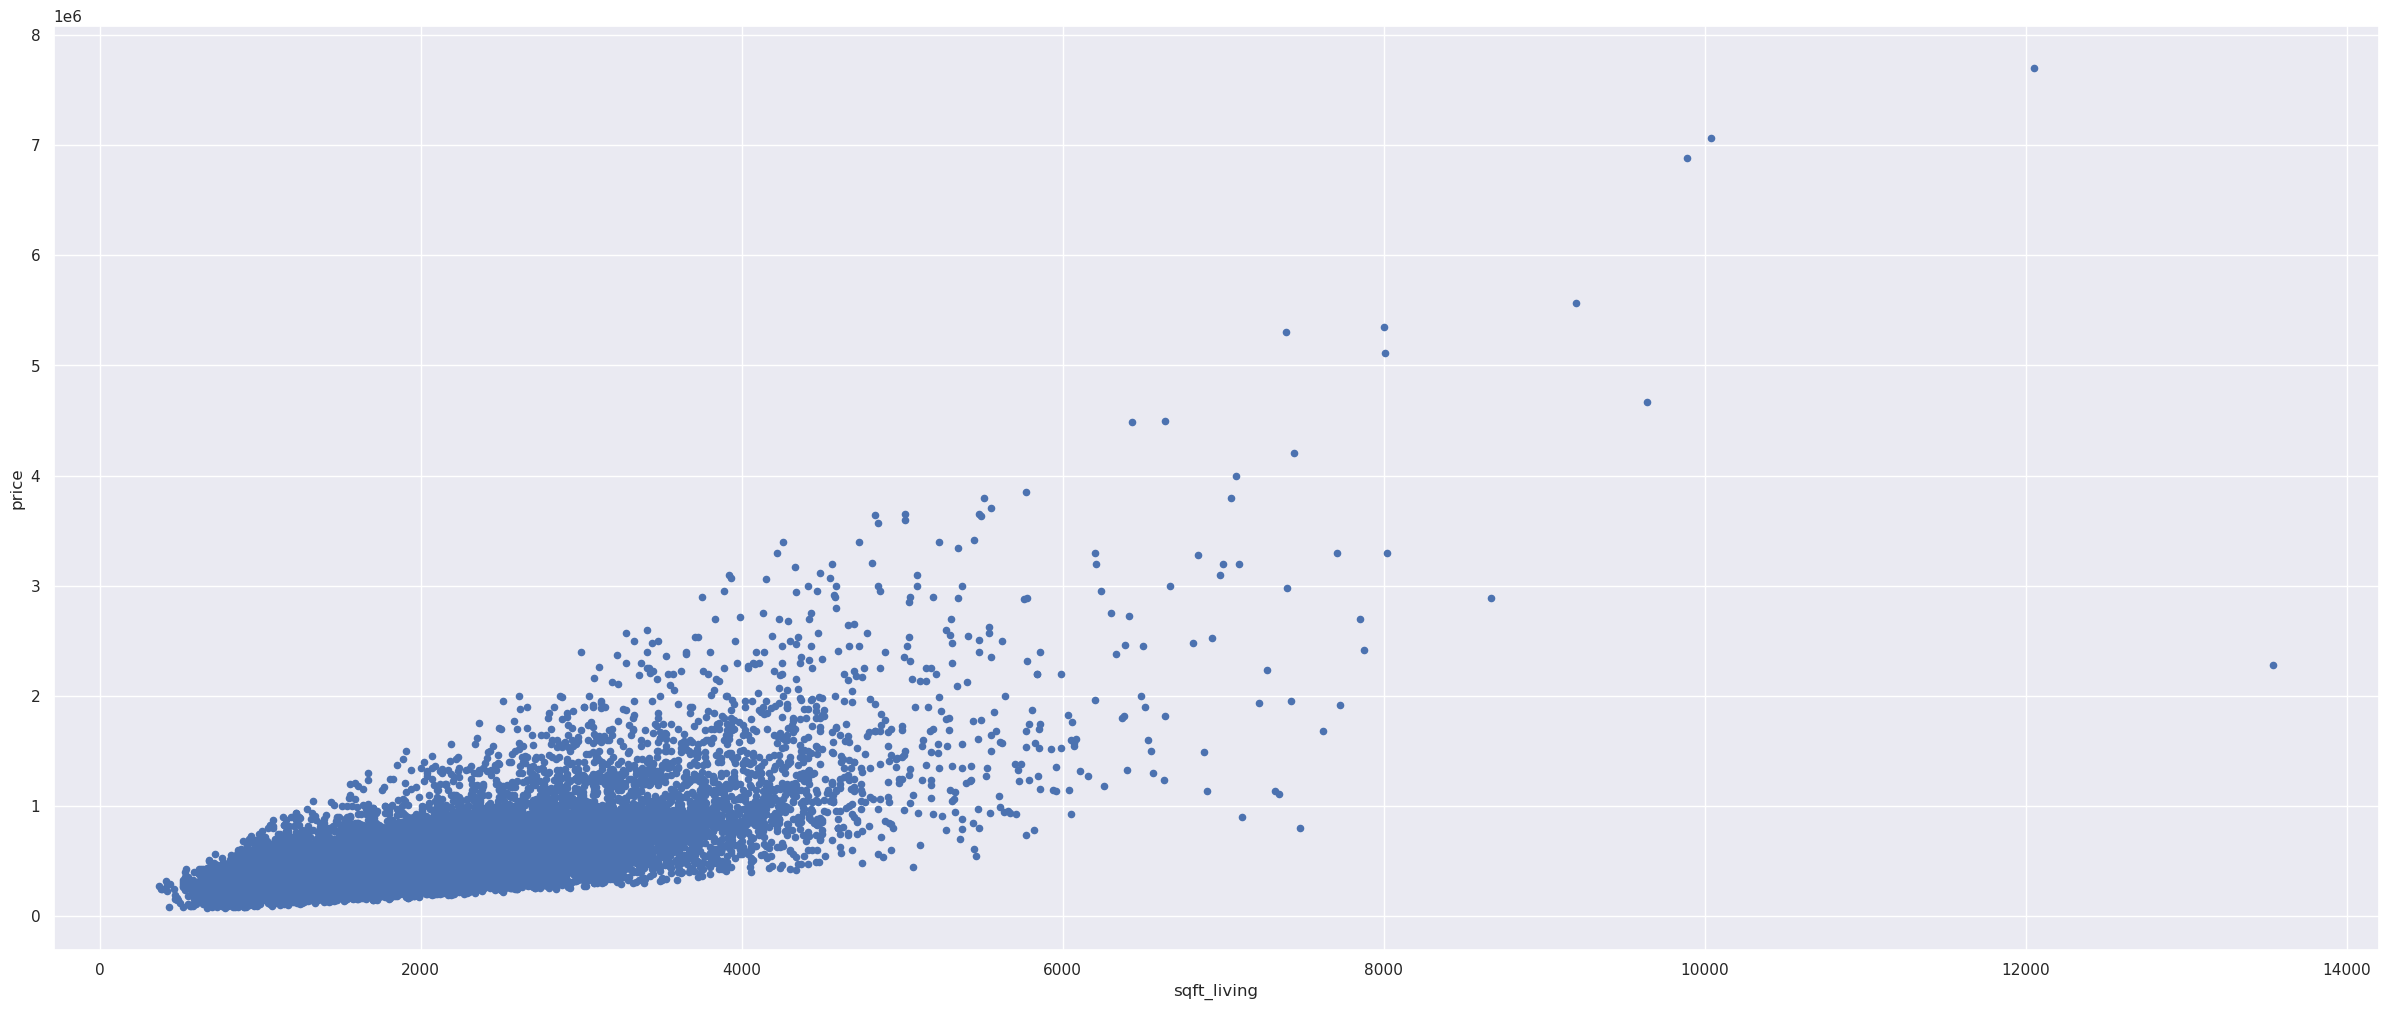

In [217]:
df.plot.scatter(x="sqft_living",y="price") 

<AxesSubplot:xlabel='view', ylabel='price'>

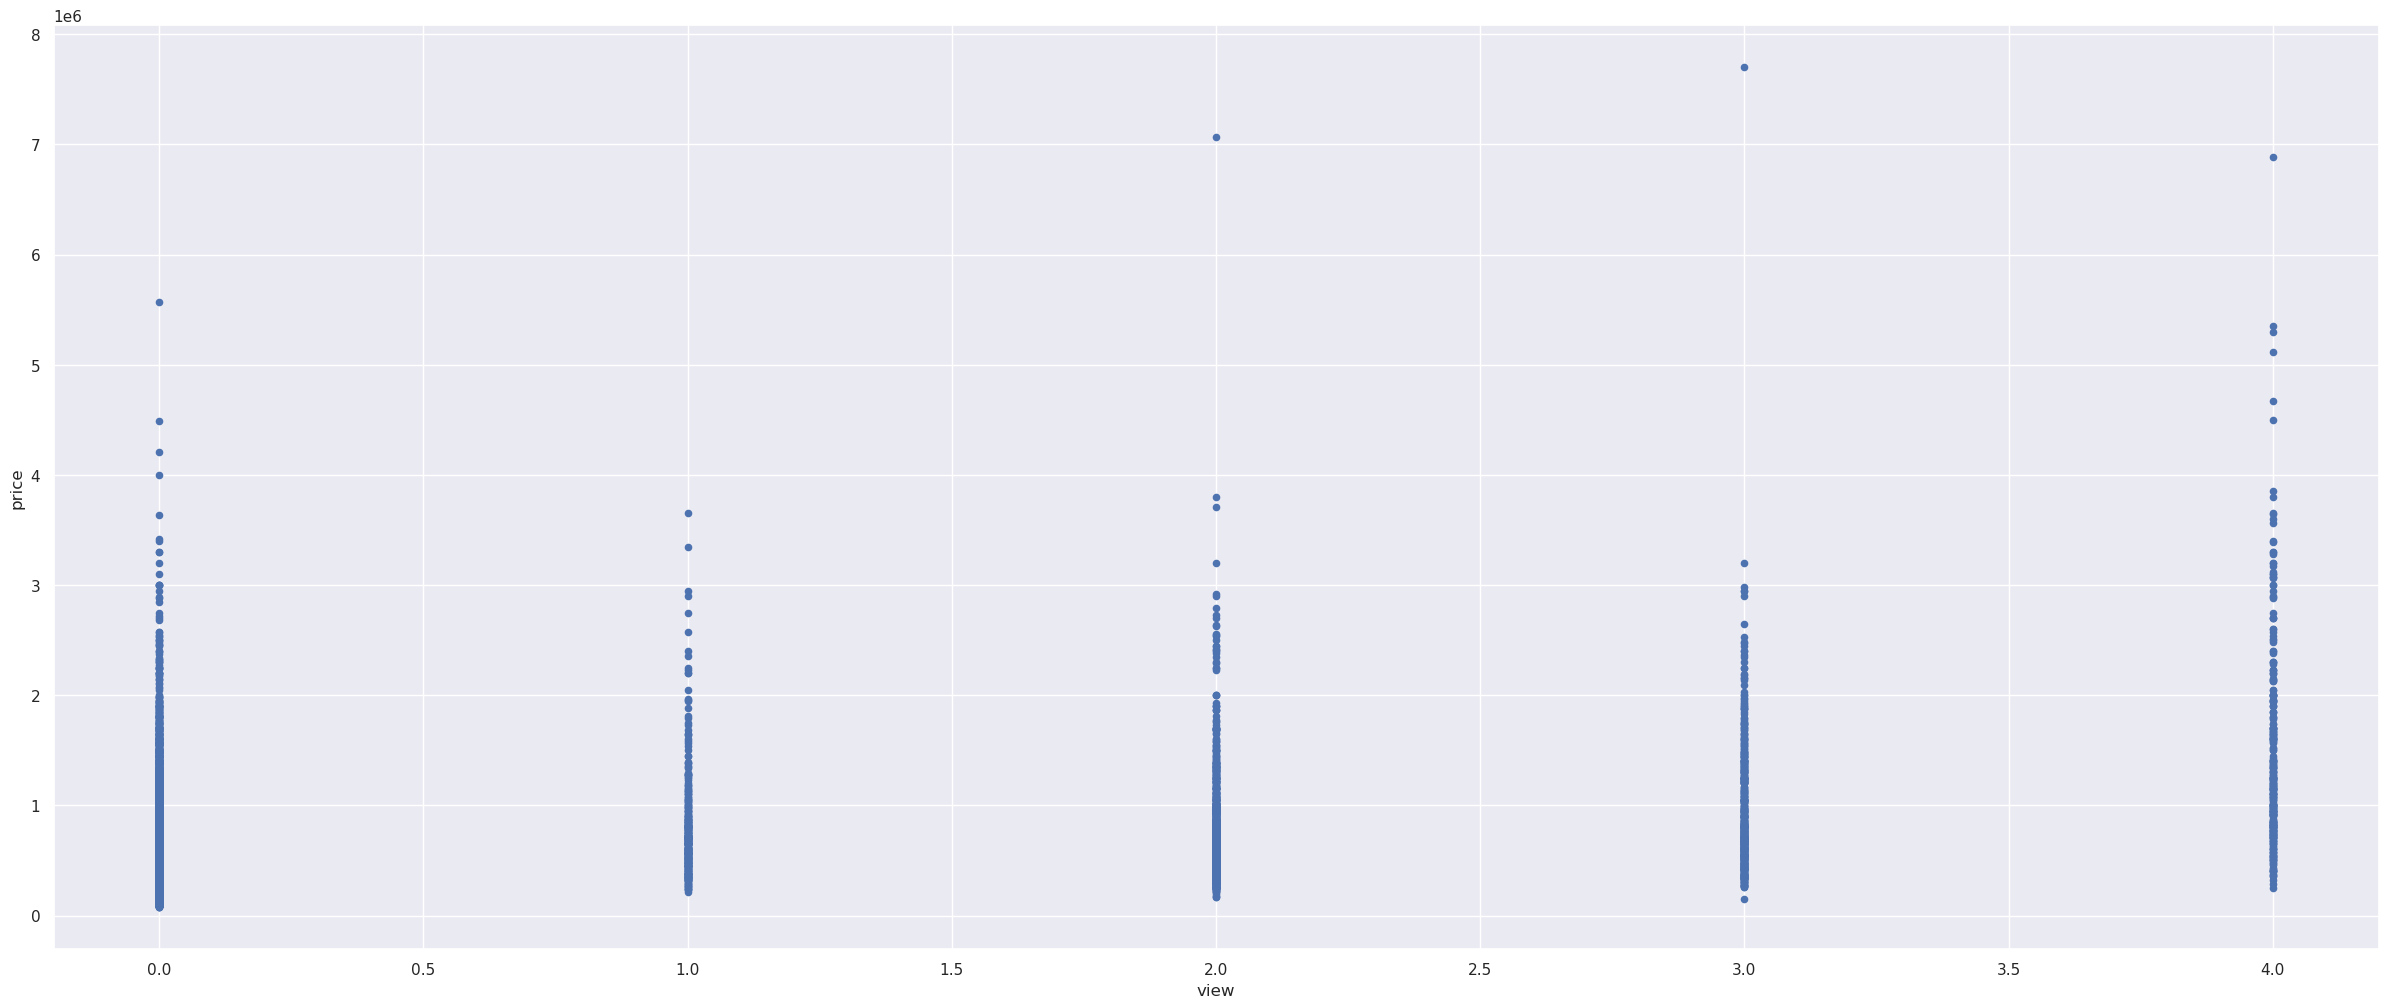

In [218]:
df.plot.scatter(x="view",y="price") 

In [219]:
df['surface'].value_counts()

120.773900    138
130.064200    135
133.780320    133
93.832030     129
154.218980    129
             ... 
232.907821      1
918.810670      1
518.770352      1
182.182783      1
132.386775      1
Name: surface, Length: 1034, dtype: int64

In [220]:
df['view'].value_counts()

0    19478
2      961
3      510
1      332
4      319
Name: view, dtype: int64

In [221]:
df['price'].value_counts()

350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: price, Length: 4025, dtype: int64

In [222]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [223]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
98133    493
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    409
98056    406
98053    404
98001    361
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98004    317
98199    317
98065    308
98122    290
98146    288
98008    283
98028    283
98040    282
98198    280
98003    280
98031    273
98072    273
98168    269
98112    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    234
98105    229
98045    221
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    117
98109    109
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, dtype: int64

In [224]:
df['yr_renovated'].value_counts()

0       20686
2014       91
2013       37
2003       36
2005       35
2007       35
2000       35
2004       26
1990       25
2006       24
2002       22
2009       22
1989       22
1991       20
1998       19
2001       19
1994       19
1993       19
1987       18
2010       18
2008       18
1983       18
1984       18
1985       17
1999       17
1992       17
1986       17
2015       16
1995       16
1988       15
1996       15
1997       15
2011       13
2012       11
1980       11
1982       11
1979       10
1970        9
1977        8
1968        8
1978        6
1975        6
1973        5
1965        5
1981        5
1964        5
1958        5
1960        4
1972        4
1963        4
1969        4
1976        3
1974        3
1953        3
1955        3
1956        3
1945        3
1957        3
1950        2
1962        2
1940        2
1946        2
1971        2
1967        2
1934        1
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, 

In [225]:
df.rename(columns={"long": "Longitude", "lat": "Latitude"})

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,Latitude,Longitude,sqft_living15,sqft_lot15,surface
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,109.62554
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,238.76071
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,71.53531
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,182.08988
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,156.07704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,142.14159
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,214.60593
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,94.76106
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,148.64480


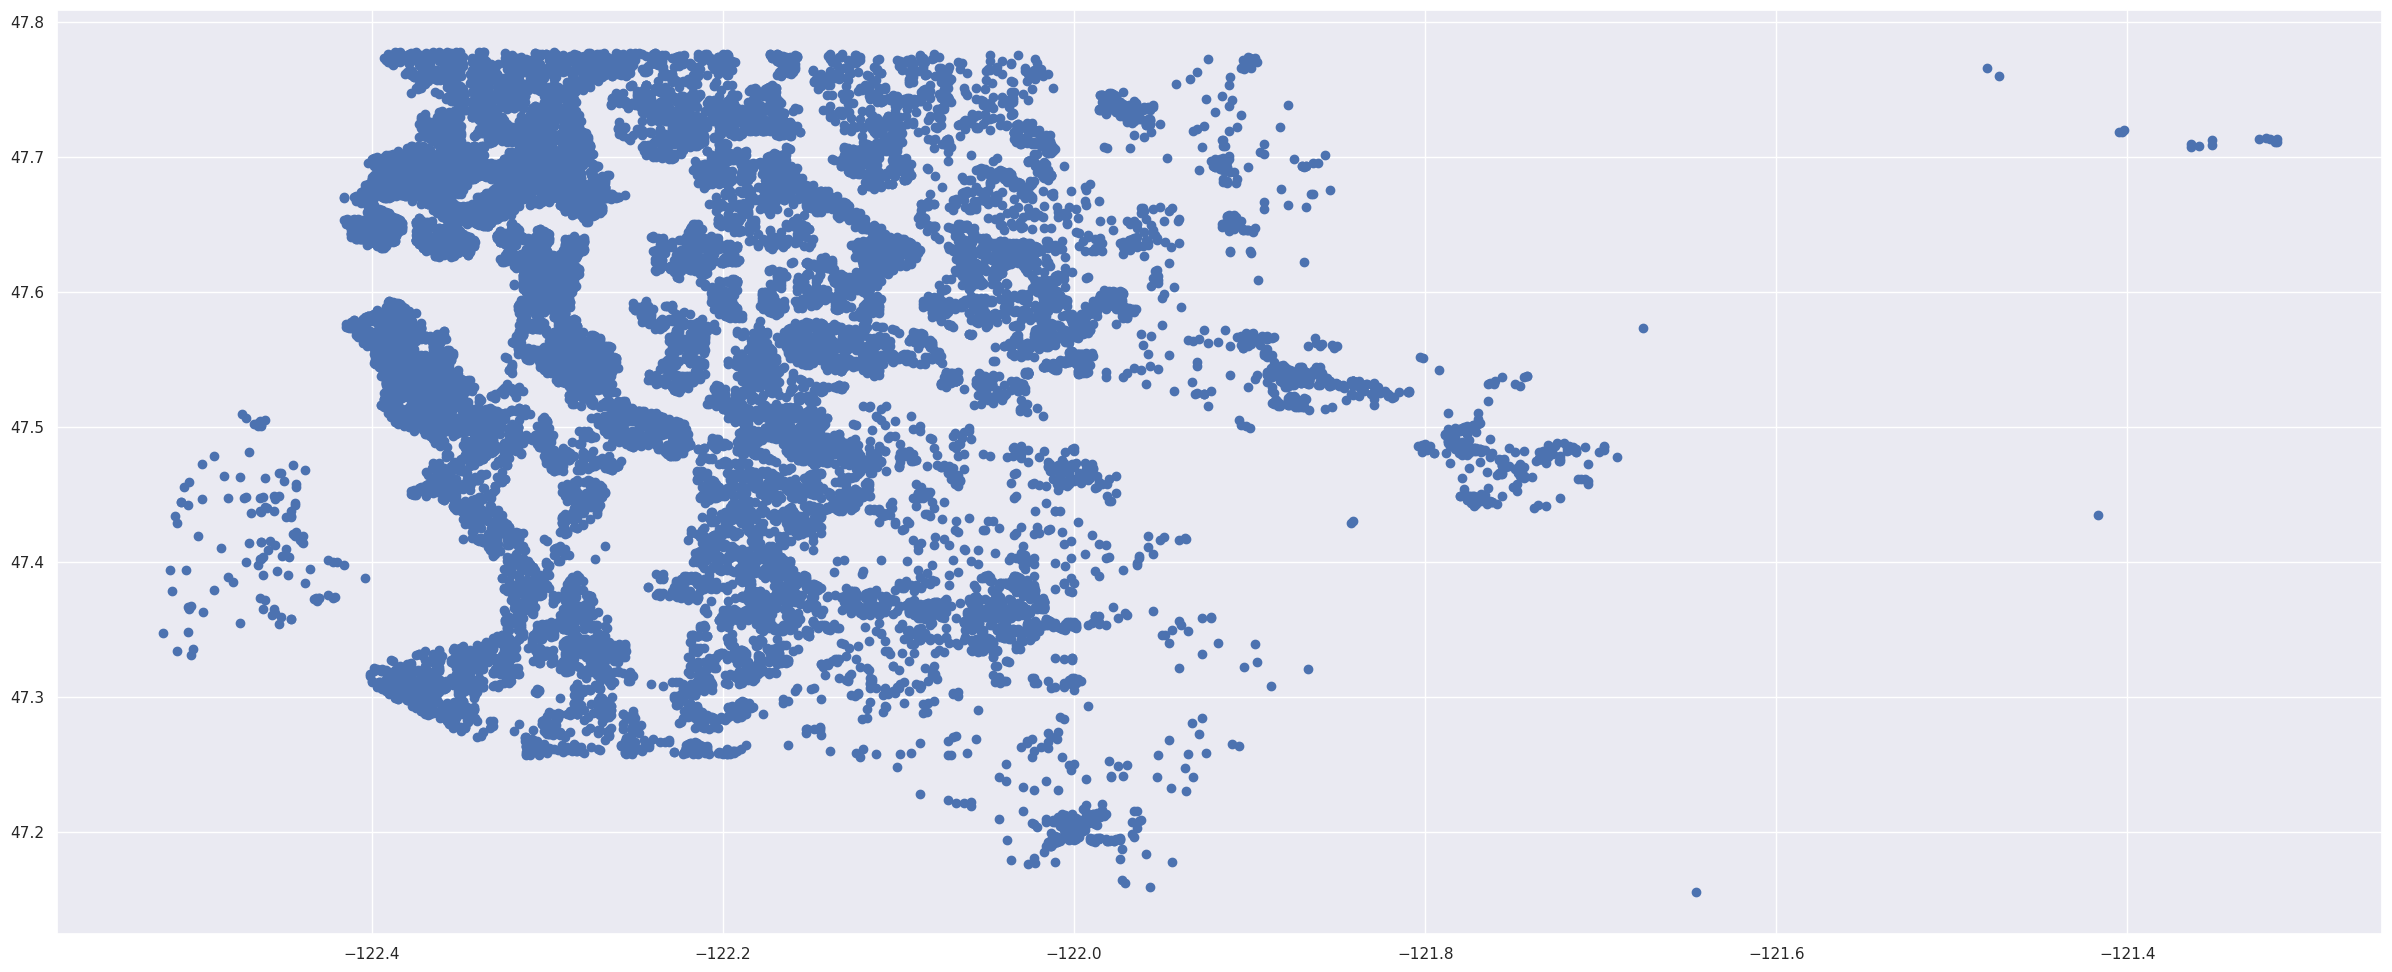

In [226]:
plt.scatter(x=df['long'],y=df['lat'] )
plt.show()  

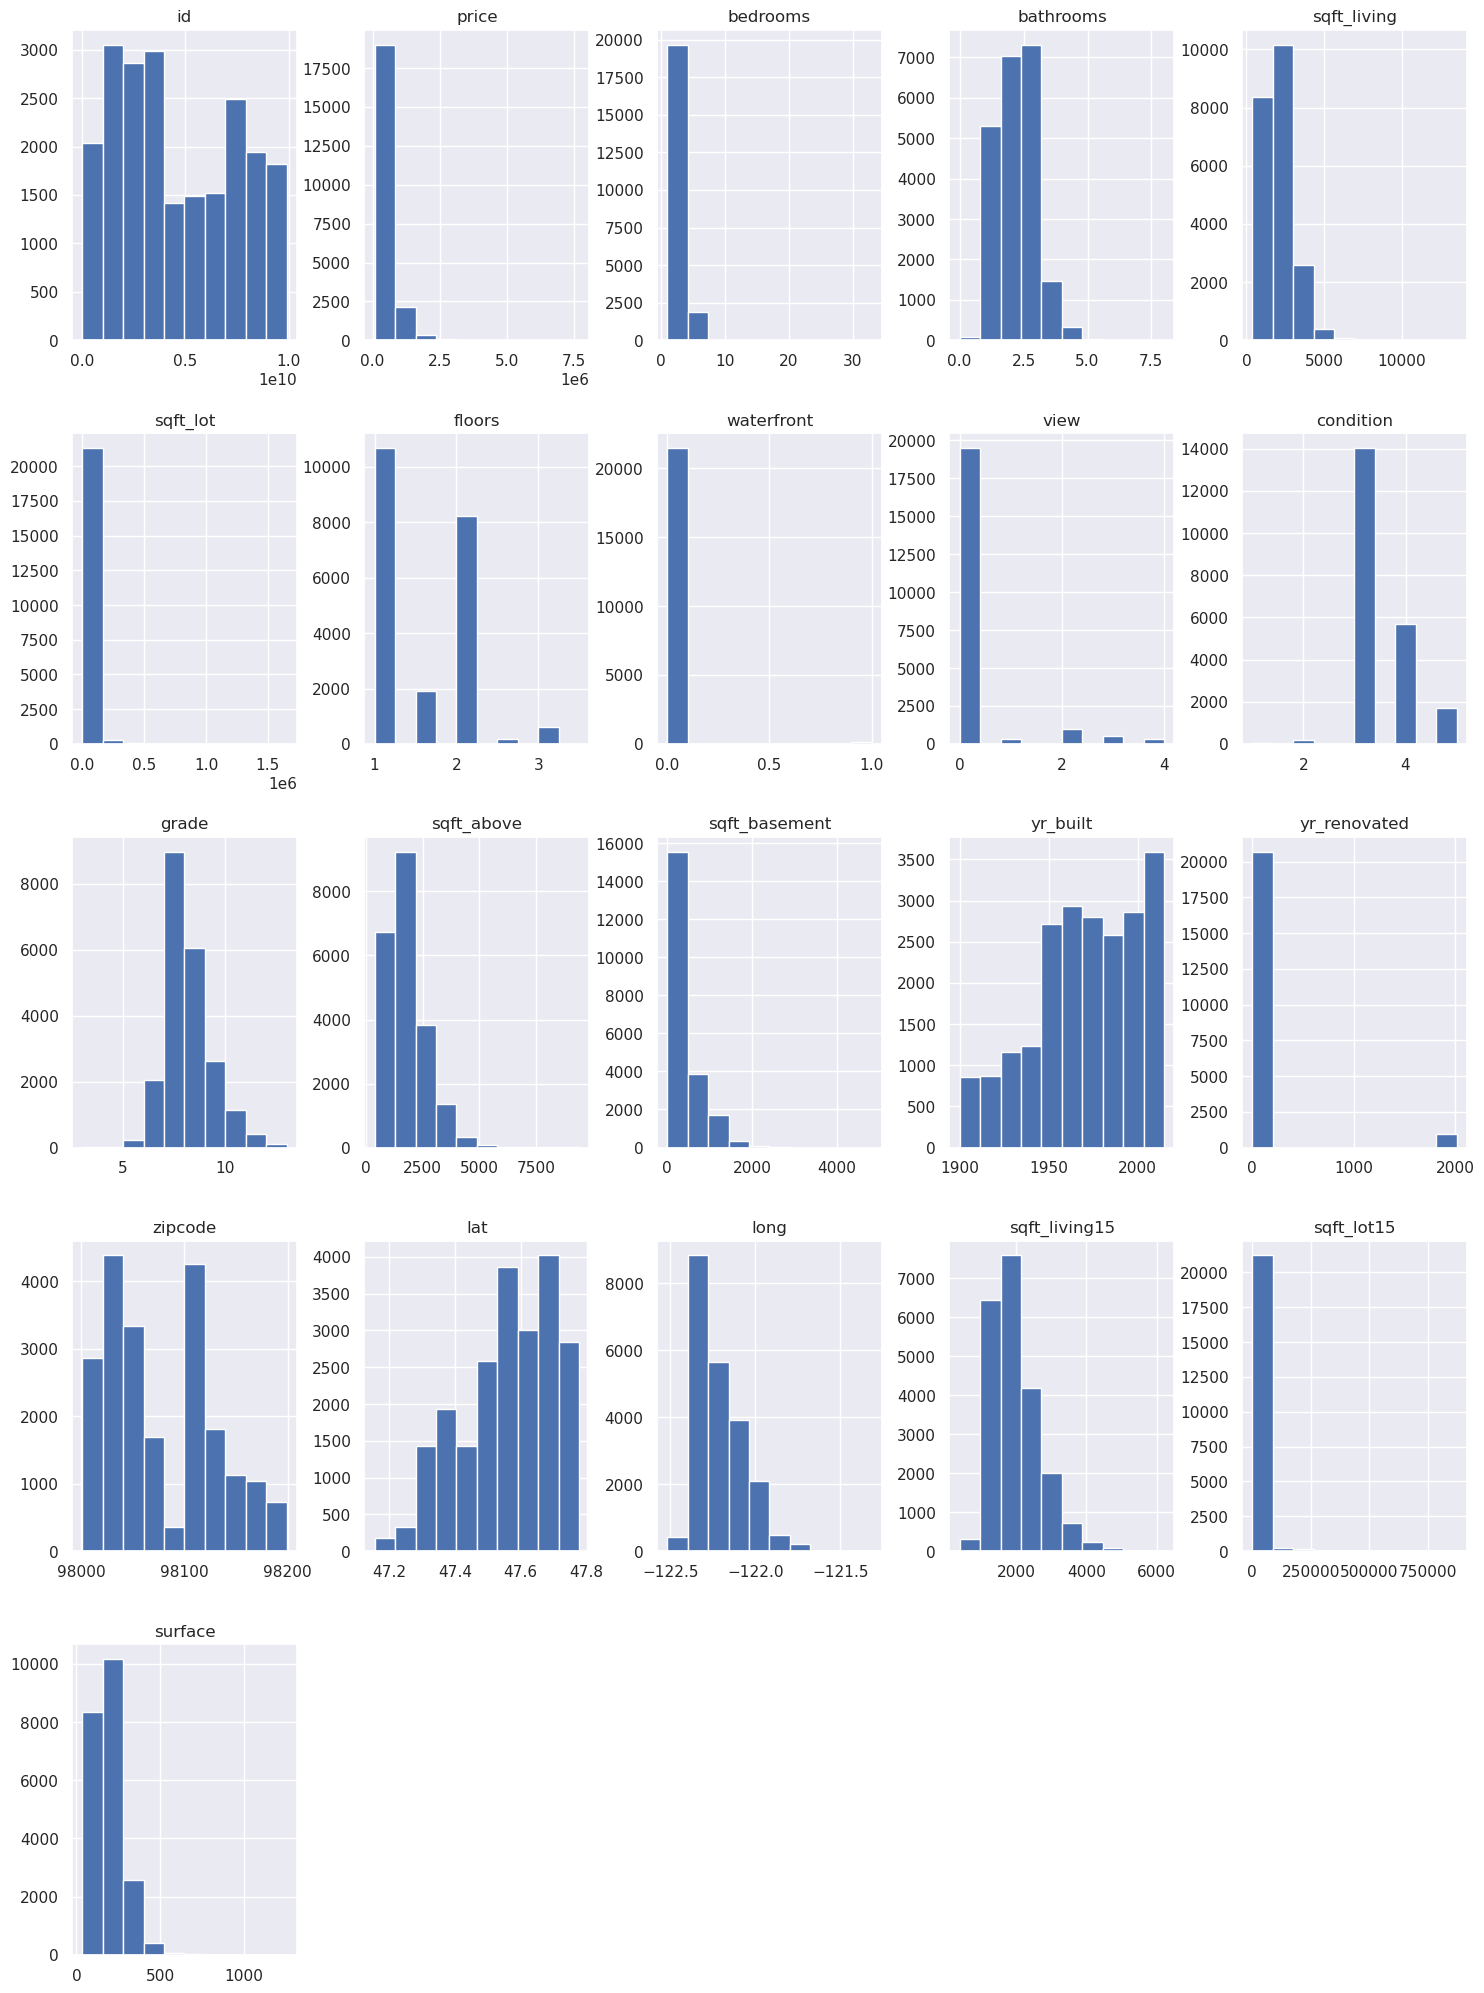

In [227]:
ax = df.hist(figsize=(18,25))

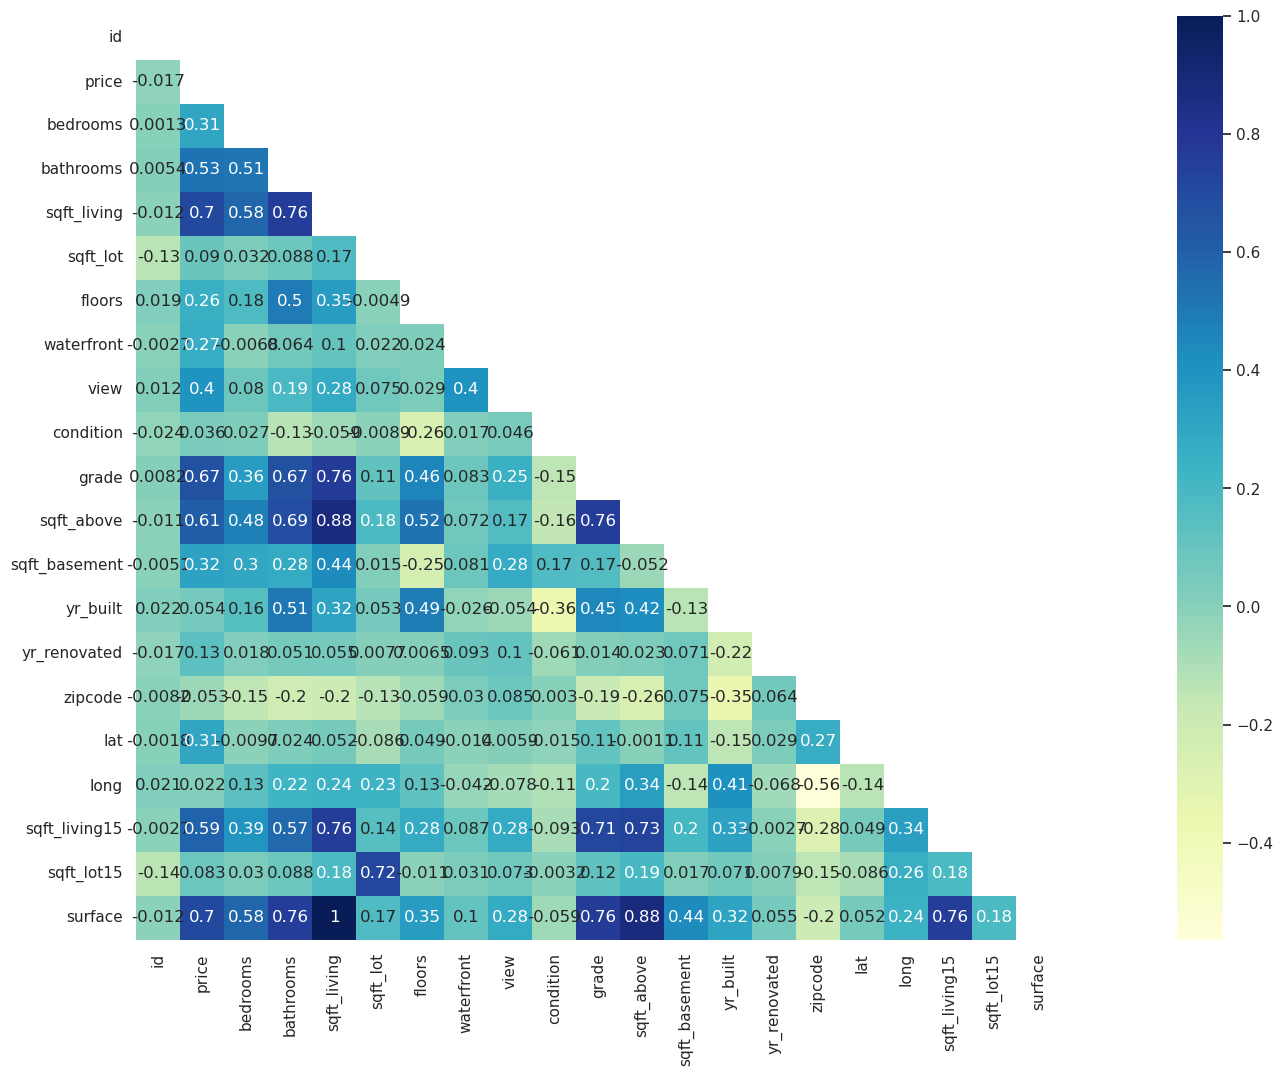

In [229]:
pearson = df.corr(method='pearson')


sns.set(rc={'figure.figsize':(30,12)})
mask = np.zeros_like(pearson)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
   ax = sns.heatmap(data=pearson, cmap="YlGnBu", mask=mask, vmax=1, annot=True, square=True)